In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import keras 
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
dia=pd.read_csv('Diamond Price Prediction.csv')

In [6]:
dia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
dia=dia.iloc[:,1:]
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
dia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
temp=dia.describe()
temp

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


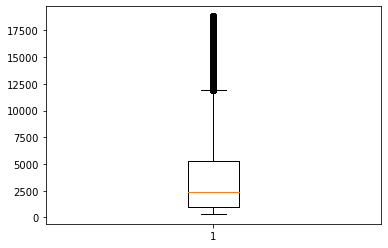

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(dia["price"]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


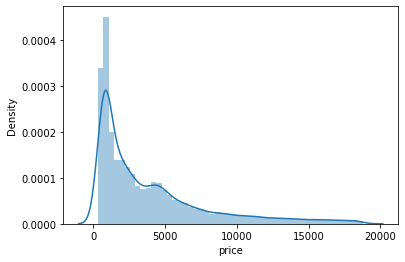

In [12]:
import seaborn as sns
sns.distplot(dia["price"]);

In [13]:
Q3=temp.loc["75%","price"]
Q3

5324.25

In [14]:
Q1=temp.loc["25%","price"]
Q1

950.0

In [15]:
IQR=Q3-Q1
IQR

4374.25

In [17]:
upper=Q3+1.5*IQR
upper

11885.625

In [18]:
lower=Q1-1.5*IQR
lower

-5611.375

In [19]:
X=dia.copy()
X

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
X[X["price"]>=upper]

,carat,cut,color,clarity,depth,table,price,x,y,z
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [21]:
X["price"].median()

2401.0

In [22]:
X["price"]=np.where(X["price"]>=upper,X["price"].median(),X["price"])
X

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [23]:
X=dia.loc[:,['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y',
       'z']]
y=dia["price"]

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
X["cut"]=le.fit_transform(X["cut"])
X["color"]=le.fit_transform(X["color"])
X["clarity"]=le.fit_transform(X["clarity"])
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss=StandardScaler()

In [29]:
X.columns
for i in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    X[i]=ss.fit_transform(X[[i]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
New_pred=lr.predict(X_test)
New_pred[:10]

array([  358.15837605,  3360.36415464,  2142.65550962,  2374.90670039,
       10540.65421932,  5685.89190074,  1900.97281595,  2615.14235368,
        3077.4108749 ,  5815.62915757])

In [39]:
y_test

1388       559
50052     2201
41645     1238
42377     1304
17244     6901
         ...  
29577      705
12564     5278
24786    13157
1332      2960
42527     1323
Name: price, Length: 16182, dtype: int64

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(New_pred,y_test)*100
r2_score(y_test,New_pred)*100

88.63641648837631

In [42]:
#Without the Outliers
print(r2_score(New_pred,y_test)*100)
print(r2_score(y_test,New_pred)*100)

87.16563694090252
88.63641648837631


### second data set

In [13]:
df=pd.read_csv("Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.drop('customerID',axis='columns',inplace=True)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
telecom_cust = telecom_cust.drop(['customerID'],axis=1)
#Convertin the predictor variable in a binary numeric variable
telecom_cust['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom_cust['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
telecom_cust = pd.get_dummies(telecom_cust)
telecom_cust.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [49]:
df1 = df[df.TotalCharges!=" "]
df1.shape

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

C:\Users\Agnes\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

In [19]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

In [20]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [21]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling','Churn']
            
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [22]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [89]:
df1 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [90]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


df1

In [93]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [95]:
X = df1.loc[:,['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','MonthlyCharges', 'TotalCharges','PhoneService', 'MultipleLines', 'TechSupport']]
y =df1['Churn']

In [98]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'PhoneService', 'MultipleLines',
       'TechSupport'],
      dtype='object')

In [78]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss=StandardScaler()

In [ ]:
X.columns
for i in ['', ]:
    X[i]=ss.fit_transform(X[[i]])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4213,1,0,0,0,6,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5035,0,0,0,0,20,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3713,0,1,1,0,46,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1720,1,1,0,0,2,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
234,1,0,0,0,29,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,0,0,1,9,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3809,0,0,0,0,50,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6196,0,0,0,0,69,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
6092,1,0,1,0,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [99]:
le=LabelEncoder()
X_train['TotalCharges' ]=le.fit_transform(X_train['TotalCharges' ])
X_test['TotalCharges' ]=le.fit_transform(X_test['TotalCharges' ])


C:\Users\Agnes\AppData\Local\Temp/ipykernel_4340/395649011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TotalCharges' ]=le.fit_transform(X_train['TotalCharges' ])
C:\Users\Agnes\AppData\Local\Temp/ipykernel_4340/395649011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['TotalCharges' ]=le.fit_transform(X_test['TotalCharges' ])


In [100]:
        X_train


,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,PhoneService,MultipleLines,TechSupport
5860,1,0,0,0,2,70.00,764,1,0,0
2458,0,1,1,0,50,105.05,3530,1,1,0
5879,0,0,1,0,33,61.05,1352,1,0,1
4708,1,0,1,1,56,61.30,2373,1,0,0
1293,0,0,1,1,67,111.20,4680,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3046,1,0,1,0,61,103.30,4223,1,1,1
1725,1,1,0,0,17,94.20,858,1,1,0
4079,1,0,1,0,10,78.15,4726,1,1,0
2254,0,1,1,0,72,93.05,4320,1,1,1


In [101]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [102]:
model=Sequential()

#First layer
model.add(Dense(input_dim=10,activation='relu',units=10))

#Second layer
model.add(Dense(15,activation='relu'))

#Third layer
model.add(Dense(15,activation='relu'))

#Last layer
model.add(Dense(1,activation='sigmoid'))


#Compiling ANN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


#Fitting ANN in training data
model.fit(X_train,y_train,batch_size=50,epochs=100)

Epoch 1/100
113/113 [==============================] - 2s 3ms/step - loss: 0.5596 - accuracy: 0.7352
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7362
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7604
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7783
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.7836
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.7868
Epoch 7/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7886
Epoch 8/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.7914
Epoch 9/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.7930
Epoch 10/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4362 - accura

(1409,)

### 3 dataset: Company Attrition

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
d3=pd.read_csv('Company Attrition Data.csv')

In [4]:
d3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
d3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
d3.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [7]:
d3.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
d3.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [374]:
d3.Sales_Occured.values

array(['sales', 'sales', 'sales', ..., 'support', 'support', 'support'],
      dtype=object)

In [377]:
d3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [339]:
d3.Sales_Occured.value_counts


<bound method IndexOpsMixin.value_counts of 0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: Sales_Occured, Length: 14999, dtype: object>

In [340]:
d3[d3.Sales_Occured=='sales']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14967,0.43,0.51,2,128,3,0,1,0,sales,low
14968,0.40,0.47,2,128,3,0,1,0,sales,medium
14969,0.43,0.46,2,157,3,0,1,0,sales,medium
14970,0.78,0.93,4,225,5,0,1,0,sales,medium


In [3]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

d3['salary'] =le.fit_transform(d3['salary'])
d3['Sales_Occured']=le.fit_transform(d3['Sales_Occured'])

In [4]:
d3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [5]:
d3.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [31]:
X=d3.loc[:,['satisfaction_level', 'last_evaluation', 'number_project',
       'Sales_Occured', 'time_spend_company', 'left','average_montly_hours'
        ]]
y=d3.iloc[:,-1]

In [32]:
X

,satisfaction_level,last_evaluation,number_project,Sales_Occured,time_spend_company,left,average_montly_hours
0,0.38,0.53,2,7,3,1,157
1,0.80,0.86,5,7,6,1,262
2,0.11,0.88,7,7,4,1,272
3,0.72,0.87,5,7,5,1,223
4,0.37,0.52,2,7,3,1,159
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,8,3,1,151
14995,0.37,0.48,2,8,3,1,160
14996,0.37,0.53,2,8,3,1,143
14997,0.11,0.96,6,8,4,1,280


In [33]:
y

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
X_test

,satisfaction_level,last_evaluation,number_project,Sales_Occured,time_spend_company,left,average_montly_hours
1670,0.44,0.57,2,6,3,1,141
13378,0.55,0.96,3,6,3,0,194
10233,0.72,0.67,5,4,2,0,210
4719,0.96,0.75,4,0,2,0,177
7003,0.96,0.54,3,8,3,0,198
...,...,...,...,...,...,...,...
11103,0.77,0.81,4,9,3,0,164
4402,0.89,0.65,4,8,3,0,184
14916,0.76,0.87,5,8,5,1,262
8362,0.76,0.94,4,9,6,0,168


In [38]:
y_train

5150     1
13288    2
8        1
1832     2
13827    1
        ..
13123    1
3264     2
9845     2
10799    0
2732     1
Name: salary, Length: 11249, dtype: int32

In [39]:
y_pred = lr.predict(X_test)


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test,y_pred))
sqrt(mean_squared_error(y_pred,y_test))


0.6282972679179688

In [48]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [46]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,Sales_Occured,time_spend_company,left,average_montly_hours
5150,0.92,0.88,3,9,3,0,184
13288,0.97,0.57,4,0,2,0,150
8,0.89,1.00,5,7,5,1,224
1832,0.82,0.92,4,5,5,1,252
13827,0.62,0.40,3,5,8,0,158
